# Lab | Text Generation from Shakespeare's Sonnet

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from keras.regularizers import l1, l2
import tensorflow.keras.utils as ku
import numpy as np

In [6]:
tokenizer = Tokenizer()

data = open('/content/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [13]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len-1 ))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy']) # Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           337500    
                                                                 
 lstm_2 (LSTM)               (None, 10, 128)           117248    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3375)              219375    
                                                                 
Total params: 727691 (2.78 MB)
Trainable params: 72769

In [15]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.7695 - accuracy: 0.0220
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5174 - accuracy: 0.0229
Epoch 3/100
484/484 [==============================] - 4s 8ms/step - loss: 6.4105 - accuracy: 0.0277
Epoch 4/100
484/484 [==============================] - 3s 7ms/step - loss: 6.2922 - accuracy: 0.0325
Epoch 5/100
484/484 [==============================] - 4s 8ms/step - loss: 6.1965 - accuracy: 0.0367
Epoch 6/100
484/484 [==============================] - 4s 8ms/step - loss: 6.0993 - accuracy: 0.0389
Epoch 7/100
484/484 [==============================] - 4s 7ms/step - loss: 6.0084 - accuracy: 0.0413
Epoch 8/100
484/484 [==============================] - 4s 8ms/step - loss: 5.9189 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 5.8283 - accuracy: 0.0485
Epoch 10/100
484/484 [==============================] - 4s 7ms/step - loss: 5.7342 - accu

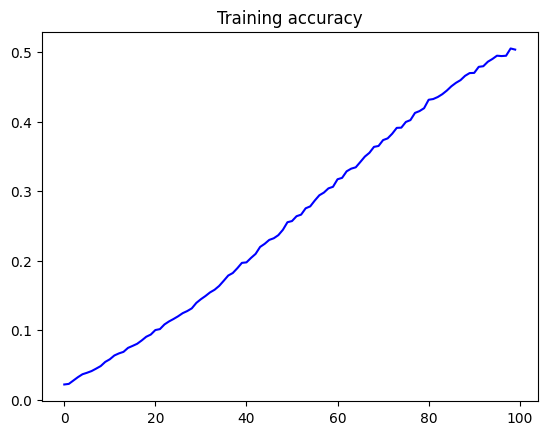

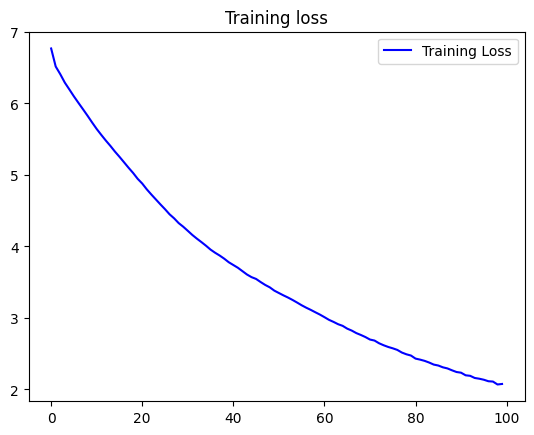

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == np.argmax(predicted):
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope invention fight make crime place fair ' ' in myself am slow bars to other it bear rolling ' thus of a chest locked cheer gems book wanting lie it ' ' ' in first triumphant leisure it so look so lie still ' not ' with thee i sing or a hate' night face lack ' a 'will' with ' in walls of show chase thee pass mine own desert that view took lie tell to ' awards breeds old about delighted relief now grow grow deem'd spent ' ' in summer speaking adieu lie at so words expire
